# Import required libraries

In [1]:
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np

# read images using I/O module of open3d

In [2]:
color_image_path = 'images/color_image1.png'
depth_image_path = 'images/depth_image1.png'

In [3]:
color_image = o3d.io.read_image(color_image_path)
depth_image = o3d.io.read_image(depth_image_path)

In [4]:
print(color_image)
print(depth_image)

Image of size 640x480, with 3 channels.
Use numpy.asarray to access buffer data.
Image of size 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


# generate RGB-D image

In [5]:
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_image, depth_image)

In [6]:
np.asarray(rgbd_image)

array(RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data., dtype=object)

# Plot images using matplolib

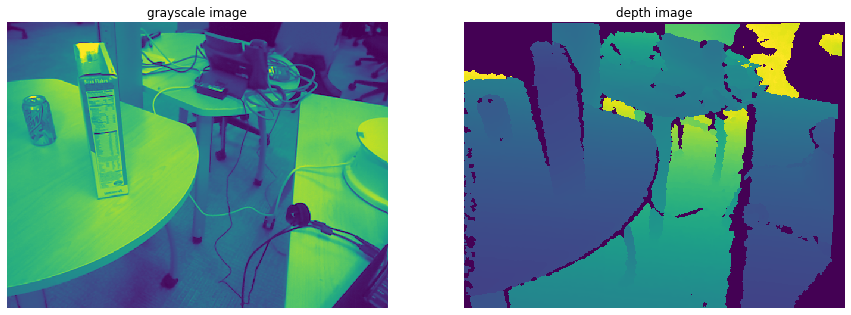

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('depth image')
plt.imshow(rgbd_image.depth)
plt.show()

# generate point cloud using RGB-D image

In [8]:
point_cloud = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, o3d.camera.PinholeCameraIntrinsic(
            o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))

In [9]:
point_cloud.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([point_cloud])